In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sn

In [101]:
data=pd.read_csv('dailyActivity_merged.csv')
data

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [102]:
data.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [103]:
data.duplicated().sum()

0

In [104]:
#data is unique with no missing data

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [106]:
data.ActivityDate=pd.to_datetime(data.ActivityDate)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [107]:
#now all datatypes are on correct types

LoggedActivitiesDistance->is auto detected activities as hiking</br>
Sedentary-> lack of activity


In [108]:
data[data.TrackerDistance != data.TotalDistance].count()/data.shape[0]*100
#only 1.5 percent is the data when the total distance was not equal to tracked distance which means that this data is outlier

Id                          1.595745
ActivityDate                1.595745
TotalSteps                  1.595745
TotalDistance               1.595745
TrackerDistance             1.595745
LoggedActivitiesDistance    1.595745
VeryActiveDistance          1.595745
ModeratelyActiveDistance    1.595745
LightActiveDistance         1.595745
SedentaryActiveDistance     1.595745
VeryActiveMinutes           1.595745
FairlyActiveMinutes         1.595745
LightlyActiveMinutes        1.595745
SedentaryMinutes            1.595745
Calories                    1.595745
dtype: float64

In [109]:
data.drop(['TotalDistance'],axis=1,inplace=True)

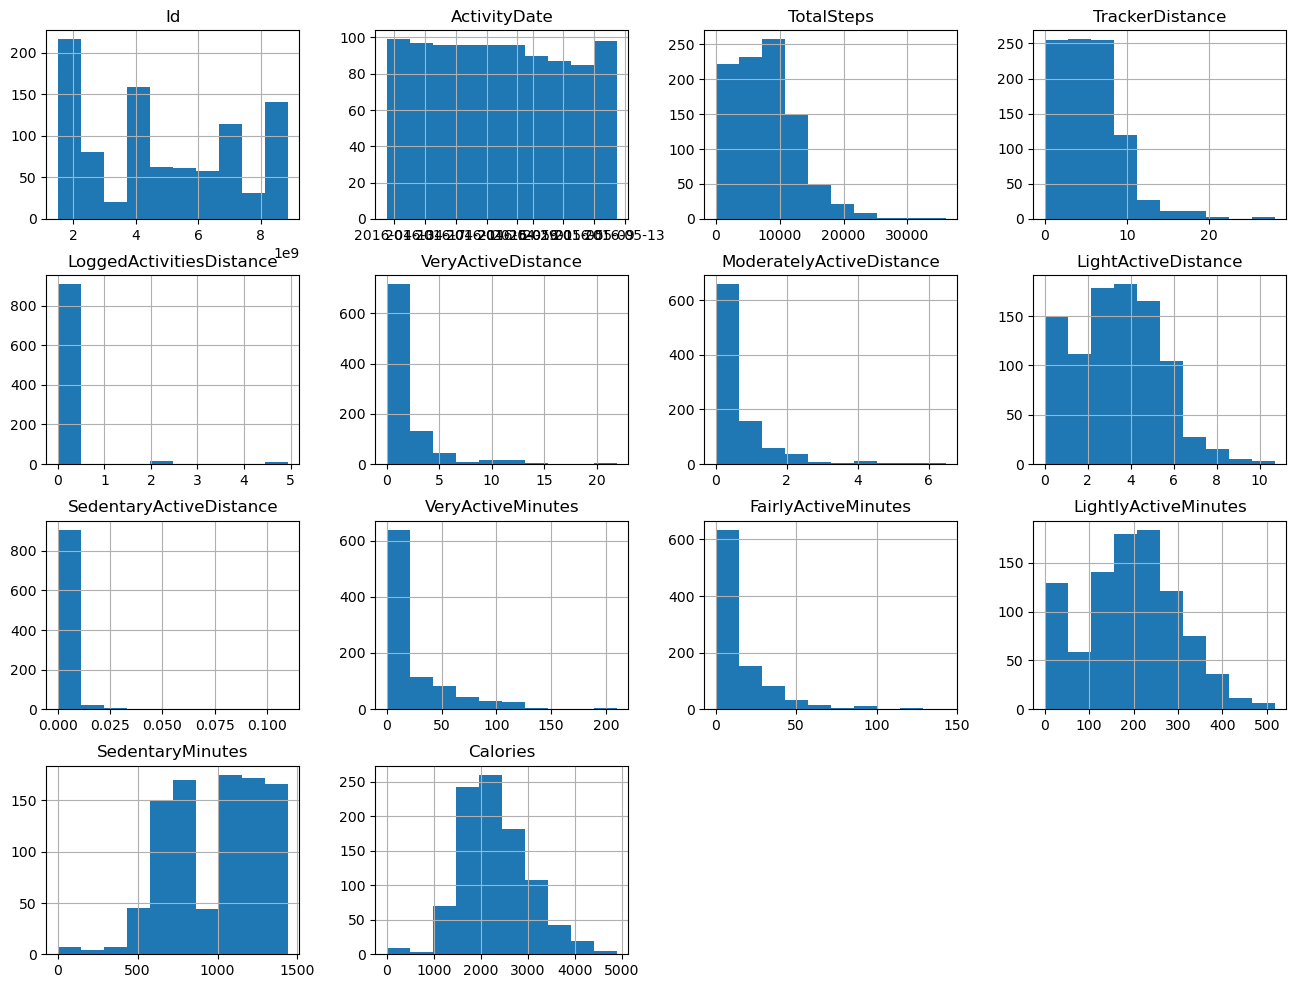

In [110]:
data.hist(figsize=((16,12)));

In [111]:
data.corr()

,Id,TotalSteps,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Id,1.000000,0.185721,0.238816,0.188015,0.308691,0.026665,0.019629,-0.015698,0.303608,0.051158,-0.098754,-0.043319,0.396671
TotalSteps,0.185721,1.000000,0.984822,0.181849,0.740115,0.507105,0.692208,0.070505,0.667079,0.498693,0.569600,-0.327484,0.591568
TrackerDistance,0.238816,0.984822,1.000000,0.162585,0.794338,0.470277,0.661365,0.074591,0.680816,0.463154,0.514713,-0.289343,0.645313
LoggedActivitiesDistance,0.188015,0.181849,0.162585,1.000000,0.150852,0.076527,0.138302,0.154996,0.234443,0.053860,0.102135,-0.046999,0.207595
VeryActiveDistance,0.308691,0.740115,0.794338,0.150852,1.000000,0.192986,0.157669,0.046117,0.826681,0.211730,0.059845,-0.061754,0.491959
ModeratelyActiveDistance,0.026665,0.507105,0.470277,0.076527,0.192986,1.000000,0.237847,0.005793,0.225464,0.946934,0.162092,-0.221436,0.216790
LightActiveDistance,0.019629,0.692208,0.661365,0.138302,0.157669,0.237847,1.000000,0.099503,0.154966,0.220129,0.885697,-0.413552,0.466917
SedentaryActiveDistance,-0.015698,0.070505,0.074591,0.154996,0.046117,0.005793,0.099503,1.000000,0.008258,-0.022361,0.124185,0.035475,0.043652
VeryActiveMinutes,0.303608,0.667079,0.680816,0.234443,0.826681,0.225464,0.154966,0.008258,1.000000,0.312420,0.051926,-0.164671,0.615838
FairlyActiveMinutes,0.051158,0.498693,0.463154,0.053860,0.211730,0.946934,0.220129,-0.022361,0.312420,1.000000,0.148820,-0.237446,0.297623


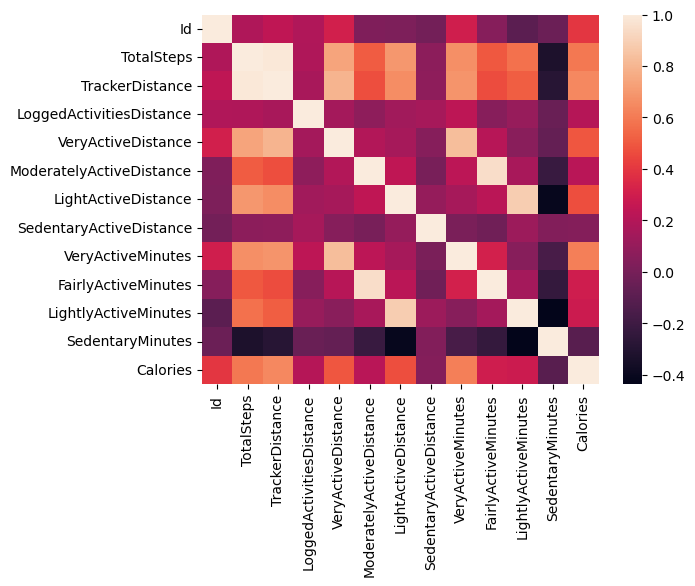

In [112]:
sn.heatmap(data.corr());

In [113]:
data['totalminutes']=data.VeryActiveMinutes+data.FairlyActiveMinutes+data.LightlyActiveMinutes+data.SedentaryMinutes
data

,Id,ActivityDate,TotalSteps,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,totalminutes
0,1503960366,2016-04-12,13162,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,1094
1,1503960366,2016-04-13,10735,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,1033
2,1503960366,2016-04-14,10460,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,1440
3,1503960366,2016-04-15,9762,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,998
4,1503960366,2016-04-16,12669,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,1040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,1440
936,8877689391,2016-05-09,20226,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,1440
937,8877689391,2016-05-10,10733,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,1440
938,8877689391,2016-05-11,21420,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,1440


In [114]:
data['day']=data.ActivityDate.dt.day_name()
data

,Id,ActivityDate,TotalSteps,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,totalminutes,day
0,1503960366,2016-04-12,13162,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,1094,Tuesday
1,1503960366,2016-04-13,10735,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,1033,Wednesday
2,1503960366,2016-04-14,10460,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,1440,Thursday
3,1503960366,2016-04-15,9762,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,998,Friday
4,1503960366,2016-04-16,12669,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,1040,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,1440,Sunday
936,8877689391,2016-05-09,20226,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,1440,Monday
937,8877689391,2016-05-10,10733,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,1440,Tuesday
938,8877689391,2016-05-11,21420,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,1440,Wednesday


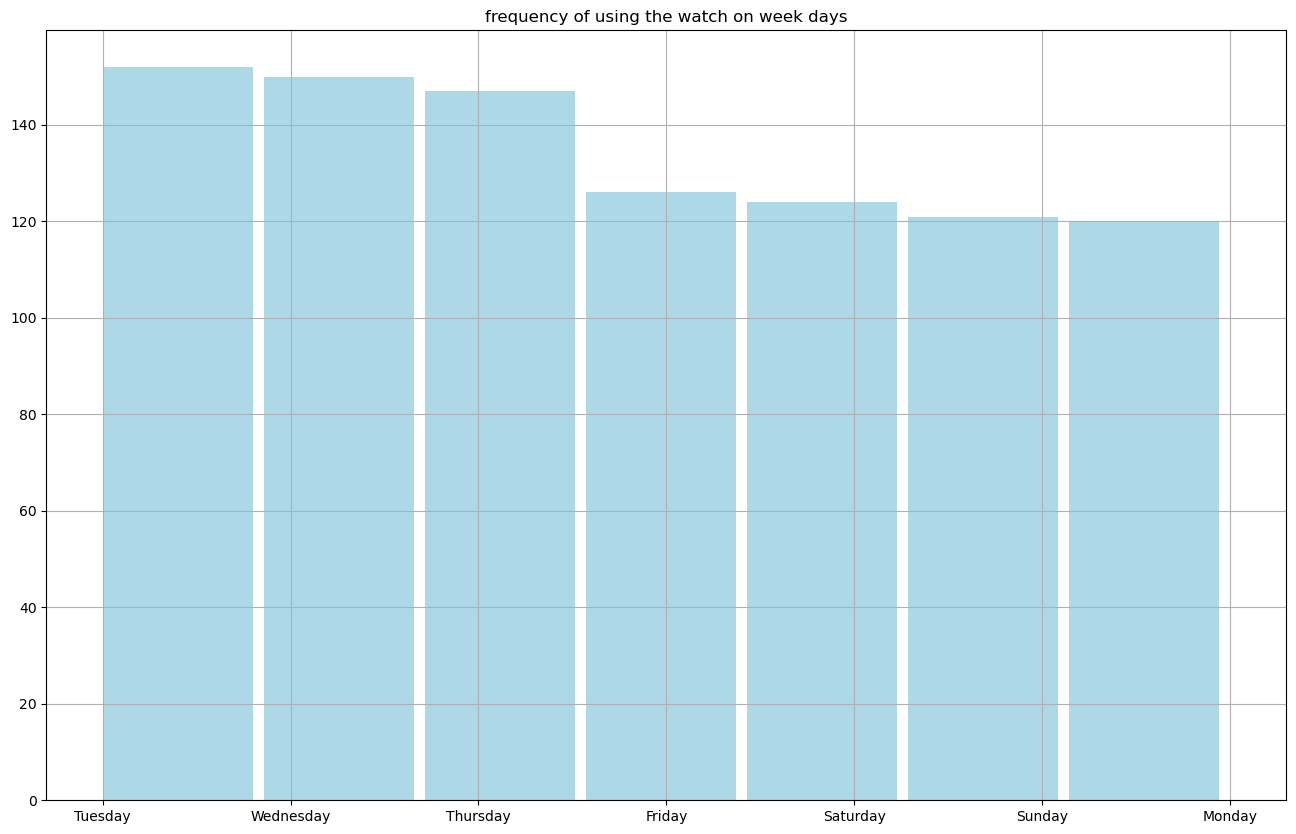

In [115]:
plt.figure(figsize=((16,10)))
plt.hist(data.day,bins=7,color='lightblue',width=0.8);
plt.title('frequency of using the watch on week days')
plt.grid(True)

we can conclude that the usage of the watch is greater on the middle of the week or in the busniuss days 

In [116]:
from pandas_profiling import ProfileReport

In [117]:
profile=ProfileReport(data,title="data profileing",html={'style':{'full-width':True}})

In [118]:
minu_data=data[['Id','ActivityDate','TotalSteps','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','Calories','totalminutes','day']]
minu_data

,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,totalminutes,day
0,1503960366,2016-04-12,13162,25,13,328,728,1985,1094,Tuesday
1,1503960366,2016-04-13,10735,21,19,217,776,1797,1033,Wednesday
2,1503960366,2016-04-14,10460,30,11,181,1218,1776,1440,Thursday
3,1503960366,2016-04-15,9762,29,34,209,726,1745,998,Friday
4,1503960366,2016-04-16,12669,36,10,221,773,1863,1040,Saturday
...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,17,4,245,1174,2847,1440,Sunday
936,8877689391,2016-05-09,20226,73,19,217,1131,3710,1440,Monday
937,8877689391,2016-05-10,10733,18,11,224,1187,2832,1440,Tuesday
938,8877689391,2016-05-11,21420,88,12,213,1127,3832,1440,Wednesday


In [119]:
minu_data.describe()

,Id,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,totalminutes
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191
std,2.424805e+09,5087.150742,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,2.320127e+09,3789.750000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000
50%,4.445115e+09,7405.500000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000
75%,6.962181e+09,10727.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000
max,8.877689e+09,36019.000000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000


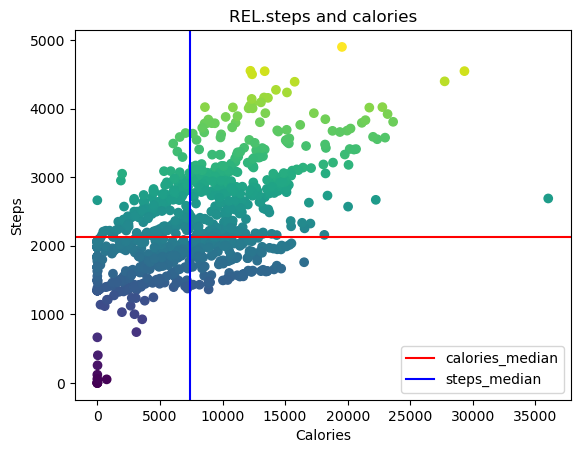

In [120]:
plt.scatter(minu_data['TotalSteps'],minu_data['Calories'],c=minu_data['Calories']);
plt.xlabel('Calories')
plt.ylabel('Steps')
plt.title('REL.steps and calories')
m_step=7405
m_calories=2134
plt.axhline(m_calories,color='red',label='calories_median')
plt.axvline(m_step,color='blue',label='steps_median')
plt.legend()
plt.show()

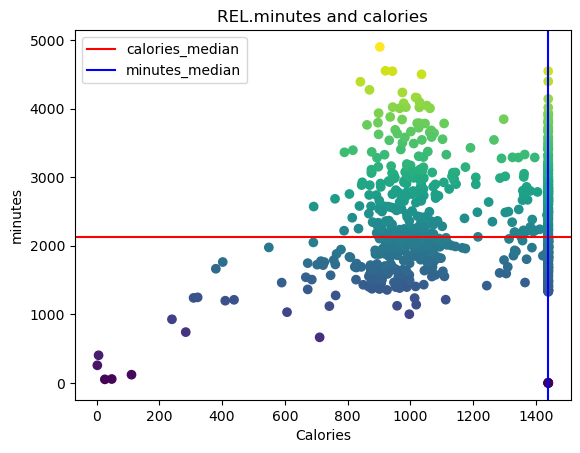

In [121]:
plt.scatter(minu_data['totalminutes'],minu_data['Calories'],c=minu_data['Calories']);
plt.xlabel('Calories')
plt.ylabel('minutes')
plt.title('REL.minutes and calories')
m_minutes=1440
m_calories=2134
plt.axhline(m_calories,color='red',label='calories_median')
plt.axvline(m_minutes,color='blue',label='minutes_median')
plt.legend()
plt.show()

([<matplotlib.patches.Wedge at 0x26c455a6df0>,
 [Text(1.0983633515717721, 0.059982896929240755, 'VeryActiveMinutes'),
  Text(1.0886022147551395, 0.1579405522030527, 'FairlyActiveMinutes'),
  Text(0.8580470838875357, 0.6882987736674362, 'LightlyActiveMinutes'),
  Text(-0.9994337278611289, -0.6641778554074256, 'SedentaryMinutes')],
 [Text(0.5991072826755119, 0.03271794377958586, '1.7%'),
  Text(0.5937830262300761, 0.086149392110756, '1.1%'),
  Text(0.4680256821204739, 0.3754356947276924, '15.8%'),
  Text(-0.5830030079189918, -0.3874370823209982, '81.3%')])

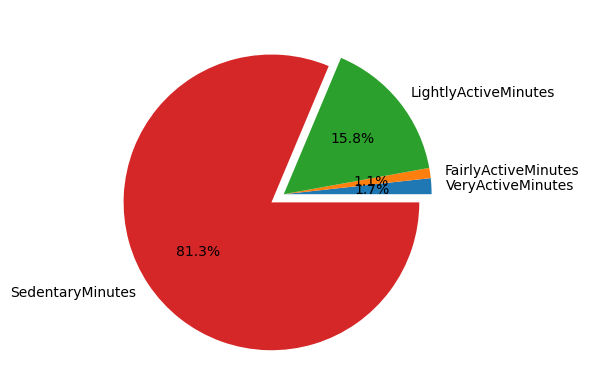

In [122]:
plt.pie(data[['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']].sum(),explode=[0,0,0,0.1],labels=['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes'],autopct='%1.1f%%')


In [123]:
#we can conclude the watch with wrong type of clients as they are unactive and the product is manufactured for active peeople